In [1]:
import os
import nltk
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
ps = PorterStemmer()



df = pd.read_csv(r"C:\Users\Athira\Downloads\mail_data.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Athira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Athira\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Athira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
train_file = pd.DataFrame(df)
test_file = pd.DataFrame(df)

In [3]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
# renaming the cols
train_file.rename(columns={'Category':'target','Message':'text'},inplace=True)
train_file

target                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham               Will ü b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [5]:
train_x = train_file['text']
test_x = test_file['text']
train_y = train_file['target']
test_y = test_file['target']

In [6]:
train_file.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [7]:
train_file.duplicated().sum()

415

In [8]:
train_file = train_file.drop_duplicates(keep = 'first')

In [9]:
train_file.duplicated().sum()

0

In [10]:
train_file['target'].value_counts()

ham     4516
spam     641
Name: target, dtype: int64

In [11]:
print(len(train_file.columns))

2


In [12]:
spam = train_file.text[train_file.target[train_file.target ==  'spam'].index]

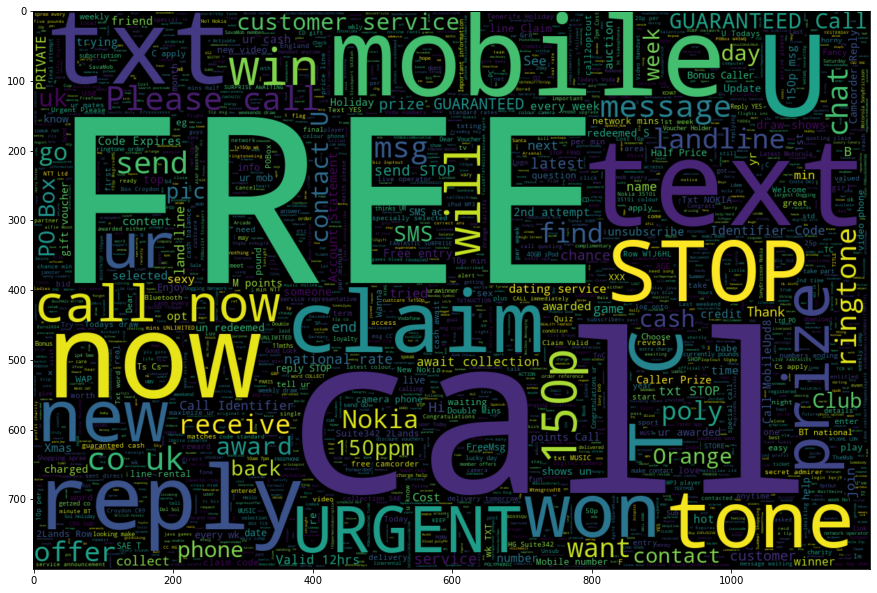

In [13]:
plt.figure(figsize = (15,20)) 
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(spam))
plt.imshow(wordcloud,interpolation = 'bilinear')

In [14]:
ham = train_file.text[train_file.target[train_file.target ==  'ham'].index]

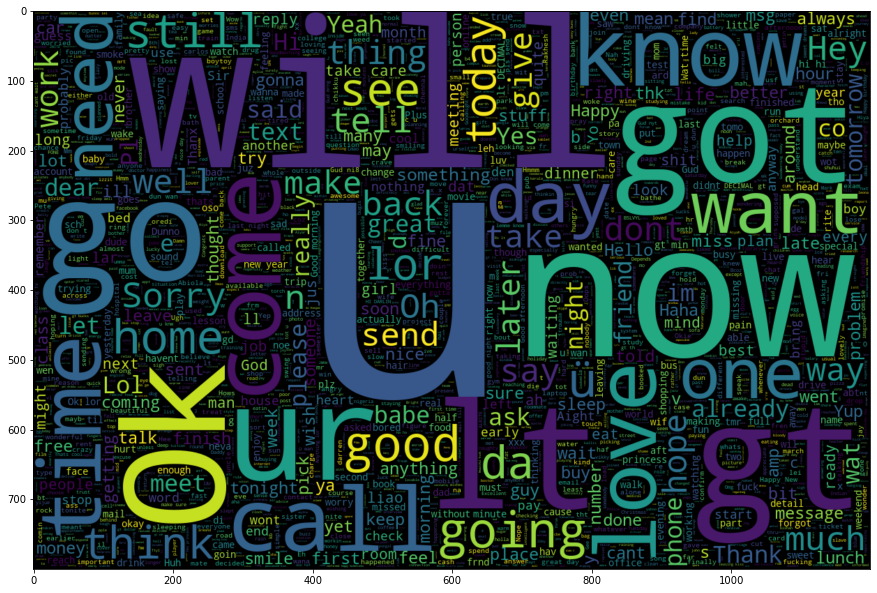

In [15]:
plt.figure(figsize = (15,20)) 
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(ham))
plt.imshow(wordcloud,interpolation = 'bilinear')

In [16]:
train_file['num_characters'] = train_file['target'].apply(len)

C:\Users\Athira\AppData\Local\Temp/ipykernel_11948/1352003842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_file['num_characters'] = train_file['target'].apply(len)


In [17]:
train_file['num_words'] = train_file['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Athira\AppData\Local\Temp/ipykernel_11948/1888479994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_file['num_words'] = train_file['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [18]:
train_x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [19]:
def tokenization(text):
    lst = text.split()
    return lst
train_x = train_x.apply(tokenization)
test_x = test_x.apply(tokenization)

In [20]:
def lowercasing(lst):
    new_lst = []
    for  i in  lst:
        i = i.lower()
        new_lst.append(i) 
    return new_lst
train_x = train_x.apply(lowercasing)
test_x = test_x.apply(lowercasing)
train_x

0       [go, until, jurong, point,, crazy.., available...
1                    [ok, lar..., joking, wif, u, oni...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor..., u, c, already...
4       [nah, i, don't, think, he, goes, to, usf,, he,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568        [will, ü, b, going, to, esplanade, fr, home?]
5569    [pity,, *, was, in, mood, for, that., so...any...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                    [rofl., its, true, to, its, name]
Name: text, Length: 5572, dtype: object

In [21]:
def remove_punctuations(lst):
    new_lst = []
    for i in lst:
        for  j in  string.punctuation:
            i = i.replace(j,'')
        new_lst.append(i)
    return new_lst
train_x = train_x.apply(remove_punctuations) 
test_x = test_x.apply(remove_punctuations)
train_x

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, dont, think, he, goes, to, usf, he, l...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568         [will, ü, b, going, to, esplanade, fr, home]
5569    [pity, , was, in, mood, for, that, soany, othe...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: text, Length: 5572, dtype: object

In [22]:
def remove_numbers(lst):
    nodig_lst = []
    new_lst = []

    for i in  lst:
        for j in  string.digits:
            i = i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst
train_x = train_x.apply(remove_numbers)
test_x = test_x.apply(remove_numbers)
train_x

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, a, wkly, comp, to, win, fa, ...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, dont, think, he, goes, to, usf, he, l...
                              ...                        
5567    [this, is, the, nd, time, we, have, tried, con...
5568         [will, ü, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, soany, other,...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: text, Length: 5572, dtype: object

In [23]:
def remove_stopwords(lst):
    stop = stopwords.words('english')
    new_lst = []
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x = train_x.apply(remove_stopwords)
test_x = test_x.apply(remove_stopwords) 
train_x

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [nd, time, tried, contact, u, u, £, pound, pri...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

In [24]:
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst = []
    for i in lst:
        i = lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
train_x = train_x.apply(lemmatzation)
test_x = test_x.apply(lemmatzation)
train_x


0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, go, usf, life, around, though]
                              ...                        
5567    [nd, time, tried, contact, u, u, £, pound, pri...
5568                   [ü, b, going, esplanade, fr, home]
5569                      [pity, mood, soany, suggestion]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

In [25]:
train_x = train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x = test_x.apply(lambda x: ''.join(i+' '  for i in x))
train_x

0       go jurong point crazy available bugis n great ...
1                                ok lar joking wif u oni 
2       free entry wkly comp win fa cup final tkts st ...
3                    u dun say early hor u c already say 
4               nah dont think go usf life around though 
                              ...                        
5567    nd time tried contact u u £ pound prize claim ...
5568                         ü b going esplanade fr home 
5569                          pity mood soany suggestion 
5570    guy bitching acted like id interested buying s...
5571                                      rofl true name 
Name: text, Length: 5572, dtype: object

In [26]:
tfidf = TfidfVectorizer(max_features=10000,min_df=4)
train_1 = tfidf.fit_transform(train_x)

train_arr = train_1.toarray()


In [27]:
train_file

target                                               text  \
0       ham  Go until jurong point, crazy.. Available only ...   
1       ham                      Ok lar... Joking wif u oni...   
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3       ham  U dun say so early hor... U c already then say...   
4       ham  Nah I don't think he goes to usf, he lives aro...   
...     ...                                                ...   
5567   spam  This is the 2nd time we have tried 2 contact u...   
5568    ham               Will ü b going to esplanade fr home?   
5569    ham  Pity, * was in mood for that. So...any other s...   
5570    ham  The guy did some bitching but I acted like i'd...   
5571    ham                         Rofl. Its true to its name   

      num_characters  num_words  
0                  3         24  
1                  3          8  
2                  4         37  
3                  3         13  
4                  3         15  
...              ...        ...  
5567               4         35  
5568               3          9  
5569               3         15  
5570               3         27  
5571               3          7  

[5157 rows x 4 columns]

# Multinomial Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB
NB_MN = MultinomialNB()
NB_MN.fit(train_arr,train_y)
test_arr = tfidf.fit_transform(test_x).toarray()
pred = NB_MN.predict(test_arr)

df = pd.DataFrame(test_file['text'].tolist(),columns = ['Text'])
df['Predictions'] = pred
df.style

In [29]:
def eval_model(y,y_pred):
    print("F1 score of the model")
    print(f1_score(y,y_pred,average='micro'))
    print("Accuracy of the model")
    print(accuracy_score(y,y_pred))
    print("Accuracy of the model in percentage")
    print(round(accuracy_score(y,y_pred)*100,3),"%")

In [30]:
from sklearn.metrics import  confusion_matrix
def confusion_mat(color):
    cof = confusion_matrix(test_y, pred)
    cof = pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['Work life balance ','Team connect','Learning and development ','Culture '],yticklabels=['Work life balance ','Team connect','Learning and development ','Culture ']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");
    

In [31]:
from sklearn.metrics  import f1_score,accuracy_score
eval_model(test_y,pred)
    
a = round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.9797200287150036
Accuracy of the model
0.9797200287150036
Accuracy of the model in percentage
97.972 %


# Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(train_arr,train_y)
pred = DT.predict(test_arr)

df = pd.DataFrame(test_file['text'].tolist(),columns = ['Text'])
df['Predictions'] = pred
df.style

In [33]:
eval_model(test_y,pred)
    
b = round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.9996410624551328
Accuracy of the model
0.9996410624551328
Accuracy of the model in percentage
99.964 %


# Gaussian Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(train_arr,train_y)
pred = NB.predict(test_arr)

df = pd.DataFrame(test_file['text'].tolist(),columns = ['Text'])
df['Predictions'] = pred
df.style

In [35]:
eval_model(test_y,pred)
    
c = round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8483488872936109
Accuracy of the model
0.8483488872936109
Accuracy of the model in percentage
84.835 %


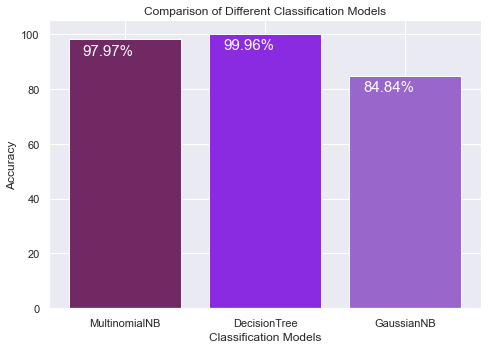

In [36]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['MultinomialNB', 'DecisionTree', 'GaussianNB']
Accuracy = [a,b,c]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc','#df73ff','#702763']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');

plt.show();